## Jupyter Data Science Workflow Training 

### From exploratory analysis to reproducible science

Tutorial by Jake VanderPlas Completed by Joey Inskeep

The link to the tutorial [here](https://www.youtube.com/watch?v=_ZEWDGpM-vM)

The link to the data used throughout the tutorial [here](https://www.seattle.gov/transportation/projects-and-programs/programs/bike-program/bike-counters/fremont-bike-counters) 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

C:\Users\jinskeep\AppData\Local\Temp\1\ipykernel_17600\3963393140.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
import os
from urllib.request import urlretrieve 
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['Total', 'West', 'East']
    return data

Everytime we run this notebook the data will be downloaded, even if saved on your computer. And with large datasets that is not very efficient. What we can do is to create a function that will only download the data if we need to download the data, basically the first time it runs.


In [3]:
data = get_fremont_data()
data.head()

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


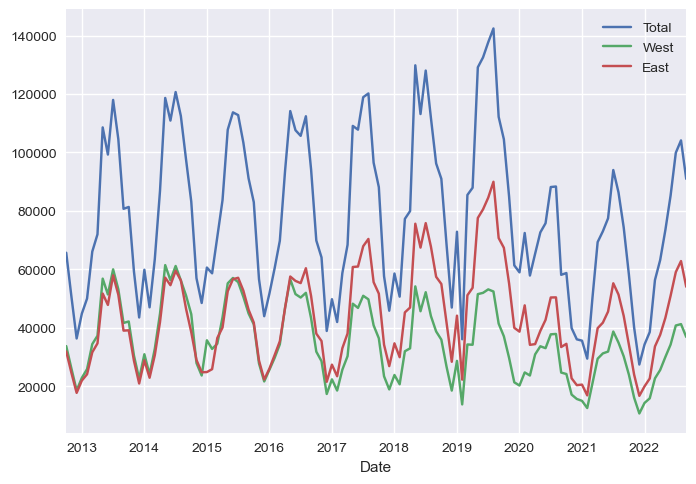

In [4]:
data.resample('M').sum().plot();

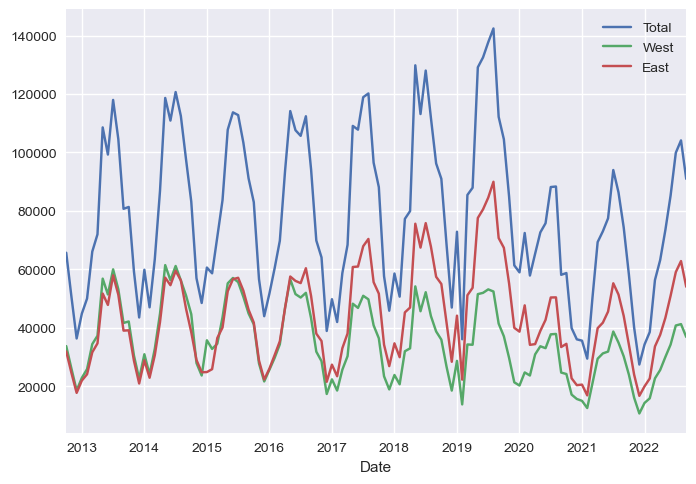

In [5]:
data.resample('M').sum().plot();

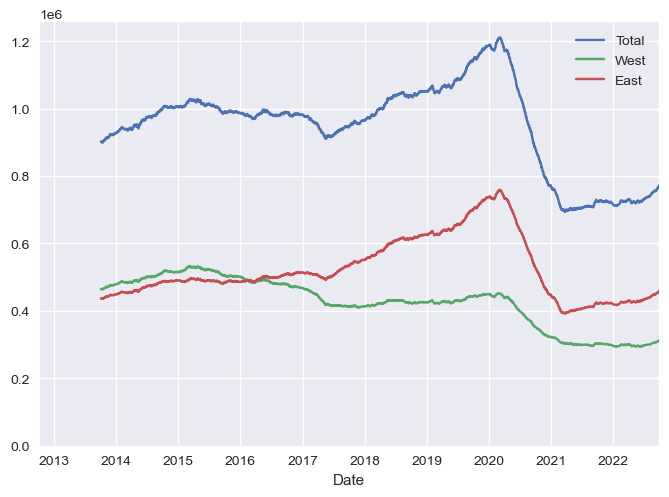

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

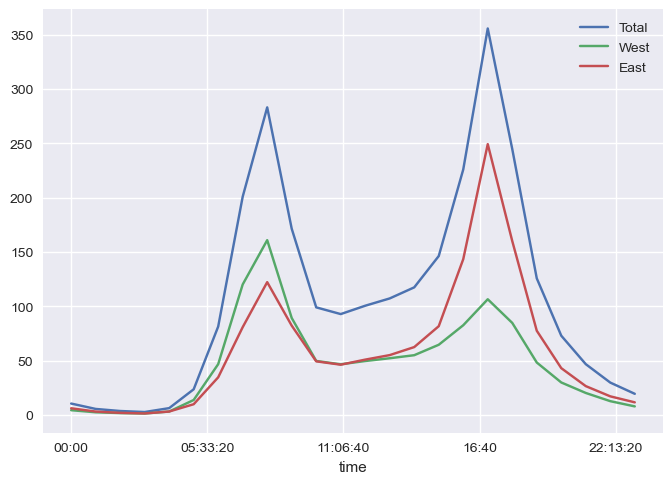

In [7]:
data.groupby(data.index.time).mean().plot();

Would be nice to see the whole dataset in this way. A pivoted dataset. 

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


    We are making a plot in which we see here is that we have a line for each day of the year. So its hard to see. Change that by plotting transparent lines on top of each other. You can see a bumch of days have the commute pattern and some days dont have commute pattern. Broad usage days most likely weekend or holidays, commute days are most likely weekdays.
    

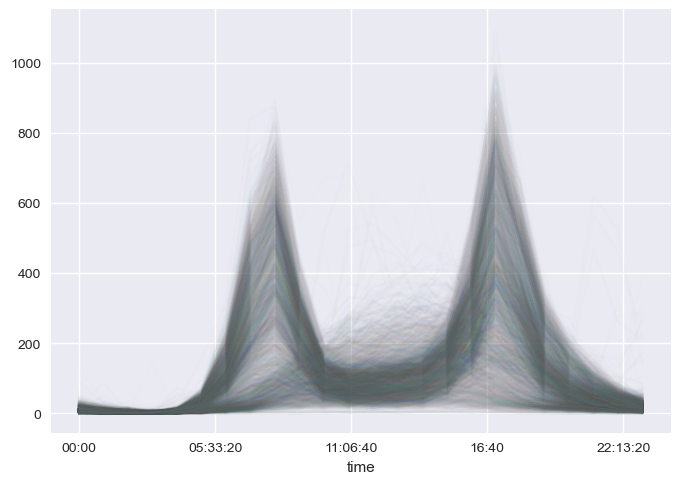

In [9]:
pivoted.plot(legend=False, alpha=0.01);